In [1]:
# importing relevant dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

%matplotlib inline

In [2]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
#path to data
houses = pd.read_csv('Resources/home_data.csv')

In [5]:
#check data format
houses.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Complete multiple Multiple Regressions to identiy valuable Feature(s)

In [6]:
#Setting X and y variables for Linear Regression Model: 2 Features
X = houses[['bedrooms','sqft_living']] 
y = houses['price'].values.reshape(-1,1)
print(X.shape, y.shape)

(21613, 2) (21613, 1)


In [ ]:
X

In [7]:
# Use train_test_split to create training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
X_train

,bedrooms,sqft_living
5945,4,1810
8423,3,1600
13488,4,1720
20731,2,1240
2358,3,1280
...,...,...
11964,3,1000
21575,3,3087
5390,3,2120
860,1,380


In [9]:
 # Create the model using LinearRegression
model = LinearRegression()

In [10]:
# Fit the model to the training data and calculate the scores for the training and testing data
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.504962230999363
Testing Score: 0.5111539241471106


Text(0.5, 1.0, 'Residual Plot')

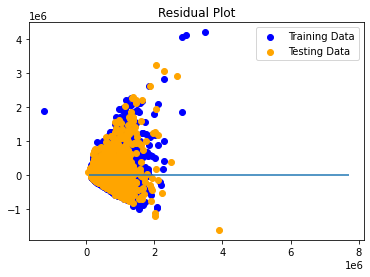

In [11]:
# Plot the Residuals for the Training and Testing data

plt.scatter(model.predict(X_train), y_train - model.predict(X_train), c="blue", label="Training Data")
plt.scatter(model.predict(X_test), y_test - model.predict(X_test), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")


In [12]:
# Use train_test_split to create training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
#Setting X and y variables for Linear Regression Model: 3 Features
X = houses[['bedrooms','bedrooms','condition']] 
y = houses['price'].values.reshape(-1,1)
print(X.shape, y.shape)

(21613, 3) (21613, 1)


In [14]:
 # Create the model using LinearRegression
model = LinearRegression()

In [15]:
# Fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.504962230999363
Testing Score: 0.5111539241471106


Text(0.5, 1.0, 'Residual Plot')

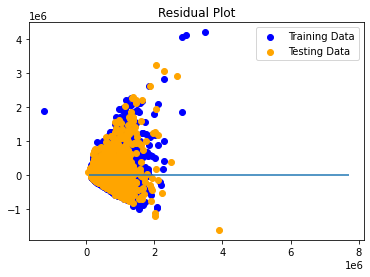

In [16]:
# Plot the Residuals for the Training and Testing data

plt.scatter(model.predict(X_train), y_train - model.predict(X_train), c="blue", label="Training Data")
plt.scatter(model.predict(X_test), y_test - model.predict(X_test), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [17]:
#Setting X and y variables for Linear Regression Model: 5 Features
X = houses[['bedrooms','bathrooms','sqft_living','zipcode','condition']] 
y = houses['price'].values.reshape(-1,1)
print(X.shape, y.shape)

(21613, 5) (21613, 1)


In [18]:
# Use train_test_split to create training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
#Create the model using LinearRegression
 model = LinearRegression()

In [21]:
# Fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.5202390123029941
Testing Score: 0.5268343152807864


Text(0.5, 1.0, 'Residual Plot')

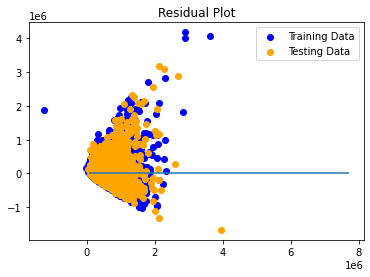

In [22]:
# Plot the Residuals for the Training and Testing data

plt.scatter(model.predict(X_train), y_train - model.predict(X_train), c="blue", label="Training Data")
plt.scatter(model.predict(X_test), y_test - model.predict(X_test), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [23]:
#scale the data (standard)
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)


In [24]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [25]:
  # Create a LinearRegression model and fit it to the scaled training data

model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

Plot Original Data vs. Scaled Data

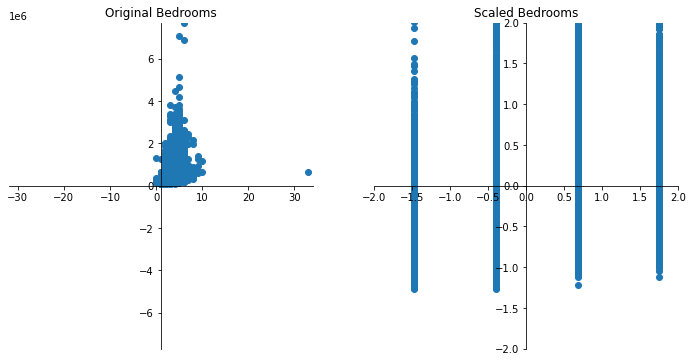

In [26]:
#Bedrooms
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Bedrooms")
axes2.set_title("Scaled Bedrooms")

maxx = X_train["bedrooms"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["bedrooms"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

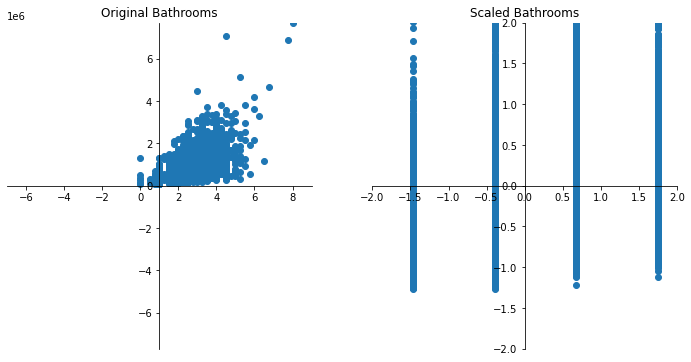

In [27]:
#Bathrooms
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Bathrooms")
axes2.set_title("Scaled Bathrooms")

maxx = X_train["bathrooms"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["bathrooms"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

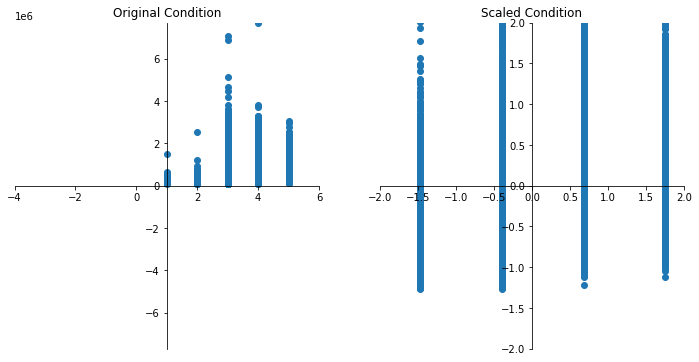

In [28]:
#Condition
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Condition")
axes2.set_title("Scaled Condition")

maxx = X_train["condition"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["condition"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

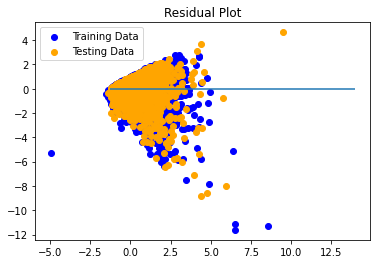

In [29]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [30]:
#create the model with scaled data
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")


R2 Score: 0.5222352388807217


In [31]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5452536127353377, R2: -3040006199696169.5


Create, Fit & Score the data with the variety of Models available to show the simular result

In [37]:
# create a LASSO model
# Note: Use an alpha of .01 when creating the model for this activity

lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5474146220944655, R2: 0.5249590127624463


In [38]:
# create a Ridge model
# Note: Use an alpha of .01 when creating the model for this activity

ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5452536626898941, R2: 0.5268342719307166


In [39]:
 # Create the model using LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.5222352388807217
